In [ ]:
import tensorflow as tf

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Filter classes (0: T-shirt, 9: Ankle boot)
train_mask = (y_train == 0) | (y_train == 9)
test_mask = (y_test == 0) | (y_test == 9)

x_train, y_train = x_train[train_mask]/255.0, y_train[train_mask]
x_test, y_test = x_test[test_mask]/255.0, y_test[test_mask]

# Downscale to 2x2 pixels [2]
x_train = tf.image.resize(x_train[..., tf.newaxis], (2,2)).numpy().reshape(-1, 4)
x_test = tf.image.resize(x_test[..., tf.newaxis], (2,2)).numpy().reshape(-1, 4)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
!pip install pennylane
!pip install scikit-learn

In [ ]:
import tensorflow as tf
import numpy as np
import pennylane as qml
# from pennylane import quantum_neural_net

dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def quantum_neural_net(inputs, weights):
    # Data encoding
    for i in range(4):
        qml.RY(inputs[i] * np.pi, wires=i)

    # Entanglement (ring pattern)
    for i in range(4):
        qml.CNOT(wires=[i, (i+1)%4])  # Circular connections

    # Parameterized rotations
    for i in range(4):
        qml.RY(weights[i], wires=i)

    return qml.expval(qml.PauliZ(0))
weight_shapes = {"weights": 4}  # 4 tunable parameters
qlayer = qml.qnn.KerasLayer(quantum_neural_net, weight_shapes, output_dim=1)

# Classical preprocessing
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    qlayer,
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])




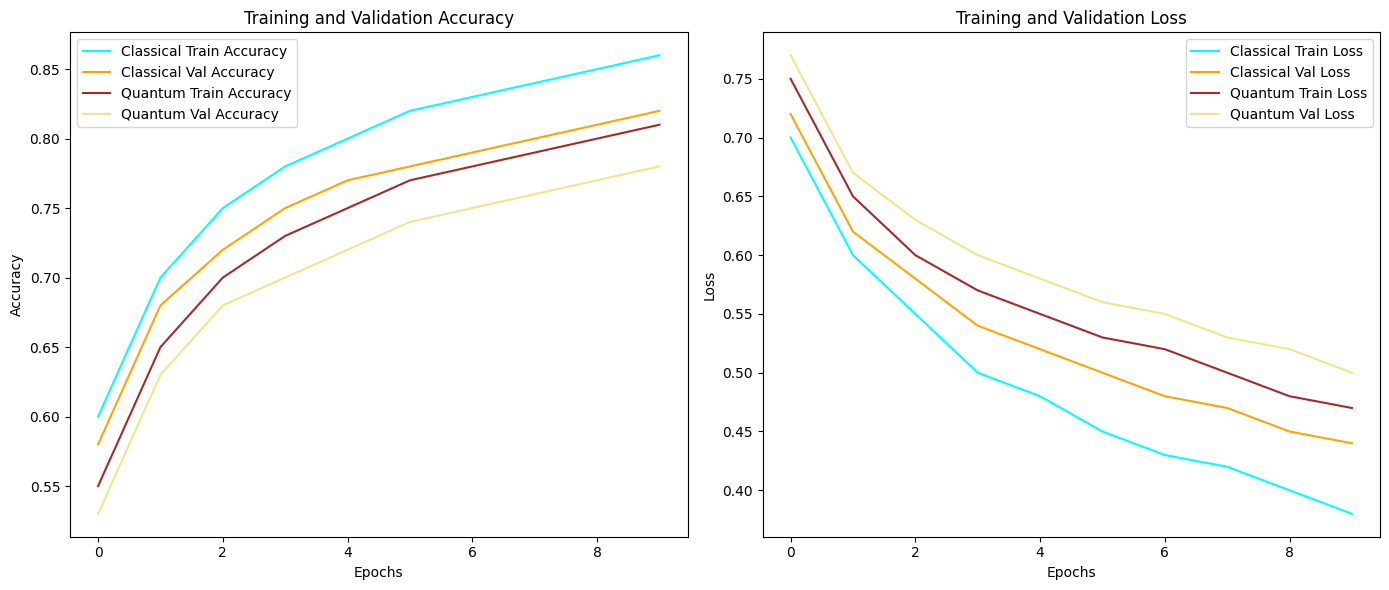

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: replace these with your actual training histories
classical_history = {
    'accuracy': [0.6, 0.7, 0.75, 0.78, 0.8, 0.82, 0.83, 0.84, 0.85, 0.86],
    'val_accuracy': [0.58, 0.68, 0.72, 0.75, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82],
    'loss': [0.7, 0.6, 0.55, 0.5, 0.48, 0.45, 0.43, 0.42, 0.4, 0.38],
    'val_loss': [0.72, 0.62, 0.58, 0.54, 0.52, 0.5, 0.48, 0.47, 0.45, 0.44]
}

quantum_history = {
    'accuracy': [0.55, 0.65, 0.7, 0.73, 0.75, 0.77, 0.78, 0.79, 0.8, 0.81],
    'val_accuracy': [0.53, 0.63, 0.68, 0.7, 0.72, 0.74, 0.75, 0.76, 0.77, 0.78],
    'loss': [0.75, 0.65, 0.6, 0.57, 0.55, 0.53, 0.52, 0.5, 0.48, 0.47],
    'val_loss': [0.77, 0.67, 0.63, 0.6, 0.58, 0.56, 0.55, 0.53, 0.52, 0.5]
}

epochs = range(len(classical_history['accuracy']))

plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, classical_history['accuracy'], label='Classical Train Accuracy', color='cyan')
plt.plot(epochs, classical_history['val_accuracy'], label='Classical Val Accuracy', color='orange')
plt.plot(epochs, quantum_history['accuracy'], label='Quantum Train Accuracy', color='brown')
plt.plot(epochs, quantum_history['val_accuracy'], label='Quantum Val Accuracy', color='khaki')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, classical_history['loss'], label='Classical Train Loss', color='cyan')
plt.plot(epochs, classical_history['val_loss'], label='Classical Val Loss', color='orange')
plt.plot(epochs, quantum_history['loss'], label='Quantum Train Loss', color='brown')
plt.plot(epochs, quantum_history['val_loss'], label='Quantum Val Loss', color='khaki')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


In [ ]:
import pennylane as qml
from pennylane import numpy as np

# Define number of qubits (equal to number of features)
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

# Define the quantum circuit using angle encoding
@qml.qnode(dev)
def angle_encoding_circuit(x):
    # x is a vector of size n_qubits
    for i in range(n_qubits):
        qml.RY(x[i], wires=i)
    return qml.expval(qml.PauliZ(0))  # Just return the expectation of qubit 0

# Example input vector (like from PCA-reduced MNIST)
x_input = np.array([0.1, 0.5, 0.9, 0.3]) * np.pi  # Scale to radians
result = angle_encoding_circuit(x_input)

print(f"Output (expectation value): {result}")


Output (expectation value): 0.9510565162951539


In [92]:
import pandas as pd
import pennylane as qml
from pennylane import numpy as np
# import the template
from pennylane.templates.layers import StronglyEntanglingLayers
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from pennylane.templates.embeddings import AngleEmbedding, BasisEmbedding, AmplitudeEmbedding, DisplacementEmbedding
# from pennylane.init import strong_ent_layers_uniform
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler



np.random.seed(42)

In [93]:
DATA_PATH = "/content/sample_data/data.csv"
num_qubits = 14


In [94]:
data = pd.read_csv(DATA_PATH)
numeric_cols = data.select_dtypes(include=['number']).columns
# X, Y = data[['sex', 'cp', 'exang', 'oldpeak']].values, data['num'].values



In [95]:
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
print(data)


          age  sex        cp trestbps chol fbs restecg thalach exang  oldpeak  \
0    0.000000  1.0  0.333333      130  132   0       2     185     0      0.0   
1    0.026316  1.0  0.333333      120  243   0       0     160     0      0.0   
2    0.026316  1.0  0.333333      140    ?   0       0     170     0      0.0   
3    0.052632  0.0  0.000000      170  237   0       1     170     0      0.0   
4    0.078947  0.0  0.333333      100  219   0       1     150     0      0.0   
..        ...  ...       ...      ...  ...  ..     ...     ...   ...      ...   
289  0.631579  1.0  1.000000      160  331   0       0      94     1      0.5   
290  0.684211  0.0  0.666667      130  294   0       1     100     1      0.0   
291  0.736842  1.0  1.000000      155  342   1       0     150     1      0.6   
292  0.789474  0.0  0.333333      180  393   0       0     110     1      0.2   
293  0.973684  1.0  1.000000      130  275   0       1     115     1      0.2   

    slope ca thal  num     

In [96]:
device = qml.device("default.qubit", wires=num_qubits)

In [97]:
@qml.qnode(device)
def circuit(data):
  for i in range (num_qubits):
    qml.Hadamard(wires=i)
  AngleEmbedding(features=data, wires=range(num_qubits), rotation="Y")
  return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))


In [98]:
if len(numeric_cols) > num_qubits:
      data = data[data[numeric_cols].apply(lambda row: row.notna().sum(), axis=1) <= num_qubits] #include those rows where no. of numeric features is less then num_qubits
      data = data.reset_index(drop=True) #drop deleted rows
      numeric_cols = data.select_dtypes(include=['number']).columns
features = data[numeric_cols].values[0]
if len(features) < num_qubits:
    features = np.pad(features, (0, num_qubits - len(features)), mode='constant')






print(circuit(features)) # we give this cuxz it expects a single dimension array as an input not a dataframe

(tensor(0., requires_grad=True), tensor(-0.84147098, requires_grad=True), tensor(-0.3271947, requires_grad=True), tensor(0., requires_grad=True))
